# Deep Convolution Neural Networks:

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

## Dataset, transforms and visualisation:

In [4]:
transform_train = transforms.Compose((
                    transforms.RandomResizedCrop(224),
                    transforms.ToTensor(),
                    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)),
                    ))

transform_test = transforms.Compose((
                    transforms.RandomResizedCrop(224),
                    transforms.ToTensor(),
                    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)),
                    ))

In [6]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)

0it [00:00, ?it/s]

100%|█████████▉| 170401792/170498071 [05:57<00:00, 474551.61it/s]

Files already downloaded and verified


170500096it [06:10, 474551.61it/s]                               

In [7]:
num_classes = 10
batch_size = 4
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,shuffle=True)

In [8]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)

print(images[1].shape)
print(labels[1].item())

torch.Size([4, 3, 224, 224])
torch.Size([3, 224, 224])
2


In [9]:
def imshow(img, title):
    npimg = img.numpy() / 2 + 0.5
    plt.figure(figsize=(batch_size,1))
    plt.axis('off')
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.title(title)
    plt.show()

In [10]:
def show_batch_images(dataloader):
    images, labels = next(iter(dataloader))
    img = torchvision.utils.make_grid(images)
    imshow(img, title=[str(x.item()) for x in labels])

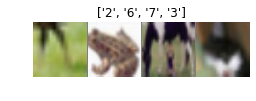

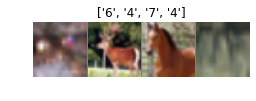

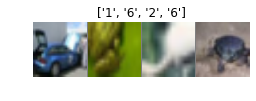

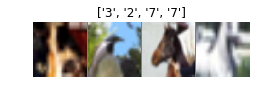

In [11]:
for i in range(4):
    show_batch_images(trainloader)

## Creating VGG-16 :

In [12]:
from torchvision import models

In [14]:
vgg = models.vgg16_bn()
#print(vgg)